# Sub-daily data
NeuralProphet can make forecasts for time series with sub-daily observations by passing in a dataframe with timestamps in the ds column. The format of the timestamps should be `YYYY-MM-DD HH:MM:SS` - see the example csv [here](https://github.com/ourownstory/neural_prophet/blob/master/example_data/yosemite_temps.csv). When sub-daily data are used, daily seasonality will automatically be fit. Here we fit NeuralProphet to data with 5-minute resolution (daily temperatures at Yosemite):

In [1]:
import pandas as pd
from neuralprophet import NeuralProphet
df = pd.read_csv('../example_data/yosemite_temps.csv')

In [2]:
m = NeuralProphet(
    changepoints_range=0.95,
    n_changepoints=50,
    trend_reg=1.5,
    log_level="ERROR",
)
metrics = m.fit(df, freq='5min')
metrics

,SmoothL1Loss,MAE,RegLoss
0,0.145577,21.777323,0.013900
1,0.038199,12.198904,0.018620
2,0.012655,7.643175,0.020511
3,0.006327,5.274982,0.018510
4,0.005203,4.693652,0.018057
5,0.004692,4.419211,0.018087


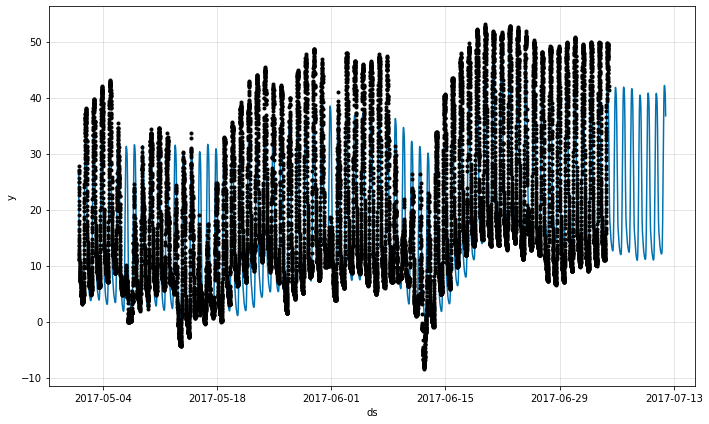

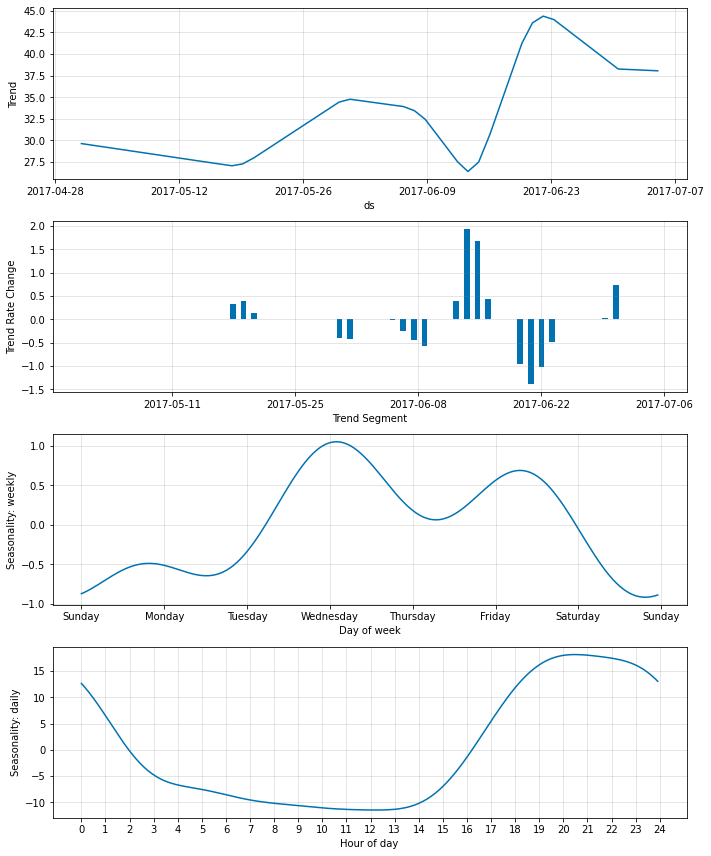

In [3]:
future = m.make_future_dataframe(df, periods=60//5*24*7, n_historic_predictions=len(df))
forecast = m.predict(future)
fig = m.plot(forecast)
# fig_comp = m.plot_components(forecast)
fig_param = m.plot_parameters()